**Hierarchical Agglomerative clustering**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def dist_matrix_cal(X):
  m,n  = X.shape
  Dist_mat = np.zeros((m, m))
  for i in range(m):
    for j in range(m):
      Dist_mat[i,j] = np.linalg.norm(X.values[i,:] - X.values[j,:])
      Dist_mat[j,i] = Dist_mat[i,j]
  return Dist_mat
def hc_agglomerative(X, clusters):
  Dist_mat = dist_matrix_cal(X)
  cluster_label = [[i] for i in range(len(X))]
  for k in range(len(X) - clusters):
    min_value = np.min(Dist_mat[np.nonzero(Dist_mat)])
    row_index = np.where(Dist_mat == min_value)[0][0]
    col_index = np.where(Dist_mat == min_value)[1][0]
    for index,cluster in enumerate(cluster_label):
      if row_index in cluster:
          x_index = index
      if col_index in cluster:
          y_index = index
    cluster_label[x_index] = cluster_label[x_index] + cluster_label[y_index]
    cluster_label.pop(y_index)
    for i in range(len(X)):
        Dist_mat[row_index][i] = min(Dist_mat[row_index][i],Dist_mat[col_index][i])
        Dist_mat[i][row_index] = min(Dist_mat[i][row_index],Dist_mat[i][col_index])
        Dist_mat[col_index][i] = np.inf
        Dist_mat[i][col_index] = np.inf
        Dist_mat[i][i] =0
    labels = np.zeros(len(X),dtype=int)
    k = 1;
    for i in cluster_label:
      for j in i:
          labels[j] = k
      k += 1
  # print(labels)
  return labels

In [3]:
def visualization(data, labels):
  targets = list(set(labels))
  pca_df = PCA(n_components=2)
  pca_df.fit(X)
  principle_components_matrix = pca_df.transform(X)
  for i, u in enumerate(targets):
      xi = [p for (j,p) in enumerate(principle_components_matrix[:,0]) if labels[j] == u]
      yi = [p for (j,p) in enumerate(principle_components_matrix[:,1]) if labels[j] == u]
      plt.scatter(xi, yi)
  plt.title("Clustering results for"+" "+ data +" dataset", fontsize = 15)
  plt.xlabel("Feature 1", fontsize = 10)
  plt.ylabel("Feature 2", fontsize = 10)
  plt.legend(targets)
  plt.show()


def external_index_calc(df, Y, labels):
  TP, TN, FP, FN = 0,0,0,0
  for i in range(len(df)):
      for j in range(len(df)):
          if Y[i] == Y[j]:
              if labels[i] == labels[j]:
                  TP = TP + 1
              else:
                  FN = FN + 1
          elif Y[i] != Y[j]:
              if labels[i] == labels[j]:
                  FP = FP + 1
              else:
                  TN = TN + 1
  jaccard_value = (TP)/(TP + FP + FN)
  rand_value = (TP + TN)/(TP + TN + FP + FN)
  print("Jaccard Coefficient = ", jaccard_value)
  print("Rand Index = ", rand_value)

Enter the file name : iyer
Enter the number of clusters : 10
Hierarchical Agglomerative clustering


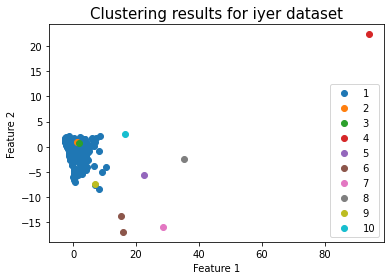

Jaccard Coefficient =  0.15824309696642858
Rand Index =  0.1882868355974245


In [4]:
filename = input("Enter the file name : ") 
clusters = input("Enter the number of clusters : ")

# datasets = ['new_dataset_2']
print("Hierarchical Agglomerative clustering")

df = pd.read_csv(filename + '.txt',delim_whitespace=True, header=None)
X = df.iloc[:,2:]
Y = df.iloc[:,1]
Y1 = [x for x in np.unique(Y) if x > 0]
clusters = len(Y1)
# print(clusters)
predicted_labels = hc_agglomerative(X, clusters)
visualization(filename, predicted_labels)
external_index_calc(df, Y, predicted_labels)